## Regulated muscle proteins in py2cytoscape
- In this notebook you will use codes to "controle" the commonly used software tool cytoscape. We will have cytoscape running "behind" the notebook and illustrate how you can apply different layout and styles of the network directly in the notebook.  
- It is related to the presentation..... 


## Installation of libraries and necessary software¶
- Code to install libraries
- State that this has to be run only once
- If necessary, further installation instructions

In [1]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
from custom import load_data as cf
import csv
from operator import itemgetter
import community 
import pandas as pd
from custom import ecdf

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading data¶

- Before you import the data it is important that you install cytoscape and a STRING app (the installation is not related to the jupyter notebooks at all). 

1) Go to the download page for https://cytoscape.org/ (https://cytoscape.org/download.html)

2) Download and install 

3) Open Cytoscape and go to apps. This will open an App manager. 

4) Search using the query STRING. Click at the result (stringApp) and install it by clicking at Install. 

In both STRING and CYTOSCAPE you can use gene or proteins names as queries and retrieve networks connected to these. In the example below we will open a network consisting of proteins found to be regulated in a study on muscle proteins. The edges of the network is saved as a sif file containing the edges in the format:
 
protein1                pp  protein2

protein3                pp  protein2

_(protein 1 is connected to protein 2 and protein 3 is also connected to protein 2)_

e.g.:

9606.ENSP00000379042	pp	9606.ENSP00000380432

9606.ENSP00000305459	pp	9606.ENSP00000380432

In the example given here, the proteins are listed with their ensembl number (http://www.ensembl.org/index.html)

- Now import relevant packages and load the network by executing the codes below.

In [2]:
# import relevant packages
from py2cytoscape.data.cyrest_client import CyRestClient
from IPython.display import Image
import json

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start of Cytoscape
cy.session.delete()

# Load a network from the file 'Muscles.sif'
network = cy.network.create_from('./data/Muscles.sif')

You may noticed that the running of the codes also loading the file into the Cytoscape software running in the back? If you are not familiar with Cytoscape we will advice you to try out the different functionality of cytoscape when you have finished the exercises below. 

### Exercise 1 - Layout and style


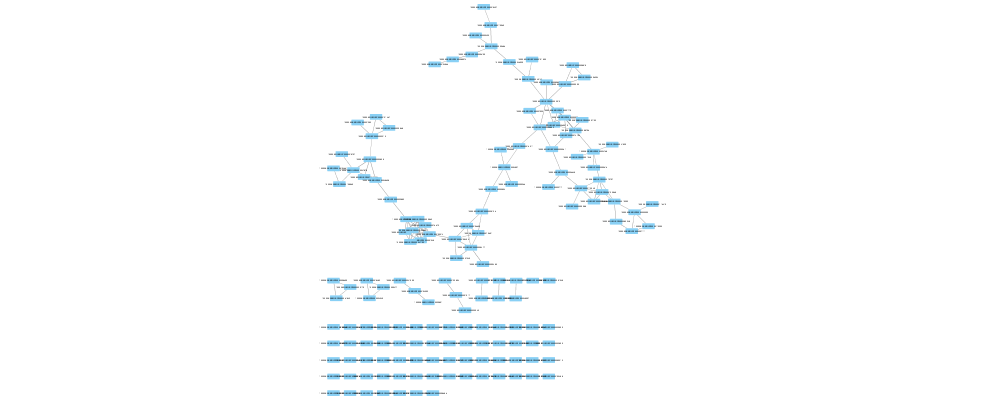

In [3]:
# Apply layout - we will look more at layouts later
cy.layout.apply(network=network)

# Fit the size of the network to the window
cy.layout.fit(network=network)

# Show the network as an image
Image(network.get_png(height=400))

In contrast to the Insulin network we looked at in the former network, this network contains nodes that are not connected to the other nodes. 

We now want to show you what happens if we change the layout and the style of the network. 

First the layout. We apply a layout algorithm to establish how the nodes and edges should be placed on the screen i a 2D version. A layout may simplify the graph and make it easier to analyse and interpret as closely related nodes are grouped together. Often we have to choose between a dozen of different layout algorithms.

Let us start by seeing what layouts are available in py2cytoscape:

In [4]:
# Get list of available layout algorithms
layouts = cy.layout.get_all()
print(json.dumps(layouts, indent=4))

[
    "attribute-circle",
    "stacked-node-layout",
    "degree-circle",
    "circular",
    "attributes-layout",
    "kamada-kawai",
    "force-directed",
    "cose",
    "grid",
    "hierarchical",
    "fruchterman-rheingold",
    "isom",
    "force-directed-cl"
]


Now let us try to apply some of these layouts. First we try out the circular one.

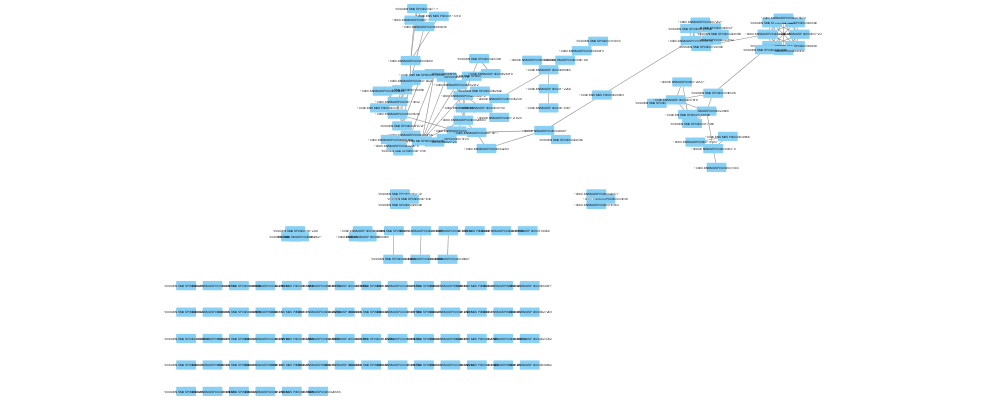

In [5]:
# Apply layout
cy.layout.apply(name='circular', network=network)

Image(network.get_png(height=400))

See, how it changed the way we look at the network and think about the network? 

Now try two other layouts of your own choice. (You can add more code cells and try out even more.)

If you experience that the network layout cause the network to bee to large or small to your window size, then add the following code to at the top of your code to fit the network to the window.

#Fit an existing network view to current window.

cy.layout.fit(network=network)

In [ ]:
# Apply layout
cy.layout.apply(name='__', network=network)

Image(network.get_png(height=400))

In [ ]:
# Apply layout
cy.layout.apply(name='__', network=network)

Image(network.get_png(height=400))

Now, you may think that the labels are too small, the edges too week and the colors are all wrong and you would like to have the graph displayed at a colored background. Then let's try to change the style of the network. (Pay attention to the small and large letters - they matter!)

Again we start by looking at the predefined styles we have available: 

In [9]:
# List the available styles
cy.style.get_all()

['Curved',
 'Marquee',
 'Sample1',
 'Minimal',
 'default black',
 'default',
 'Sample2',
 'Directed',
 'Solid',
 'Universe',
 'Big Labels',
 'Gradient1',
 'Sample3',
 'Ripple',
 'Nested Network Style']

Now we will apply the default style "Directed" together with the layout "Force-directed"

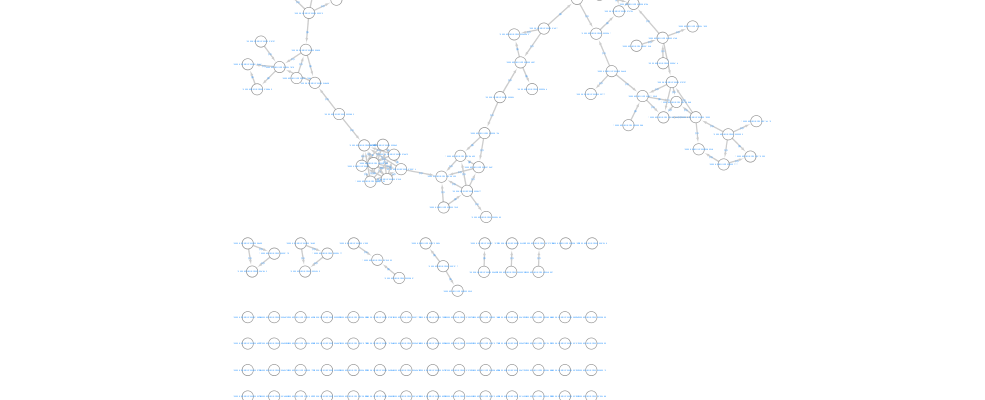

In [10]:
# Apply a default style - here 'Directed'
cy.style.apply(style = cy.style.create('Directed'), network = network)

# Apply a layout
cy.layout.apply(name='force-directed', network=network)

#Fit to the window
cy.layout.fit(network=network)

Image(network.get_png(height=400))

Try out some of the different styles - maybe even combined with different layouts. Not all of the styles fits our network!

In [ ]:
# Apply a default style of your own choice
cy.style.apply(style = cy.style.create('__'), network = network)

# Apply a layout of your own choice
cy.layout.apply(name='__', network=network)

#Fit to the window
cy.layout.fit(network=network)

Image(network.get_png(height=400))

We can also make our own style. For this we need to know what options we have for the nodes, the edges and for the network. Below we show you how to get the visual properties for the nodes. Modify the codes in the next two cells to retrieve lists of visual properties for the edges and the network, respectively. 

In [11]:
# Get node Visual Properties
node_vps = cy.style.vps.get_node_visual_props()

# Show it
print(json.dumps(node_vps, indent=4))

[
    "NODE_CUSTOMPAINT_3",
    "NODE_CUSTOMGRAPHICS_POSITION_5",
    "NODE_CUSTOMGRAPHICS_POSITION_4",
    "NODE_CUSTOMGRAPHICS_POSITION_1",
    "NODE_CUSTOMGRAPHICS_POSITION_3",
    "NODE_CUSTOMGRAPHICS_8",
    "NODE_HEIGHT",
    "NODE_CUSTOMPAINT_2",
    "NODE_LABEL_WIDTH",
    "NODE_LABEL_FONT_FACE",
    "NODE_LABEL_COLOR",
    "NODE_TOOLTIP",
    "NODE_WIDTH",
    "NODE_PAINT",
    "NODE_CUSTOMPAINT_8",
    "COMPOUND_NODE_PADDING",
    "NODE_LABEL",
    "NODE_CUSTOMPAINT_5",
    "NODE_BORDER_PAINT",
    "NODE_CUSTOMGRAPHICS_SIZE_5",
    "NODE_CUSTOMGRAPHICS_3",
    "NODE_Y_LOCATION",
    "NODE_NESTED_NETWORK_IMAGE_VISIBLE",
    "NODE_BORDER_STROKE",
    "NODE_LABEL_POSITION",
    "NODE_LABEL_TRANSPARENCY",
    "NODE_CUSTOMGRAPHICS_9",
    "NODE_CUSTOMPAINT_4",
    "NODE_CUSTOMGRAPHICS_POSITION_9",
    "NODE_CUSTOMGRAPHICS_7",
    "NODE_SELECTED_PAINT",
    "NODE_CUSTOMGRAPHICS_POSITION_2",
    "NODE_CUSTOMGRAPHICS_4",
    "NODE_CUSTOMGRAPHICS_SIZE_4",
    "NODE_DEPTH",
    "NODE_B

In [ ]:
# Get edge Visual Properties (change all the "node" to "edge")
node_vps = cy.style.vps.get_node_visual_props()

# Show it
print(json.dumps(node_vps, indent=4))

In [ ]:
# Get network Visual Properties 
node_vps = cy.style.vps.get_node_visual_props()

# Show it
print(json.dumps(node_vps, indent=4))

Now, let's look at how we use all the visual options to make our own style:

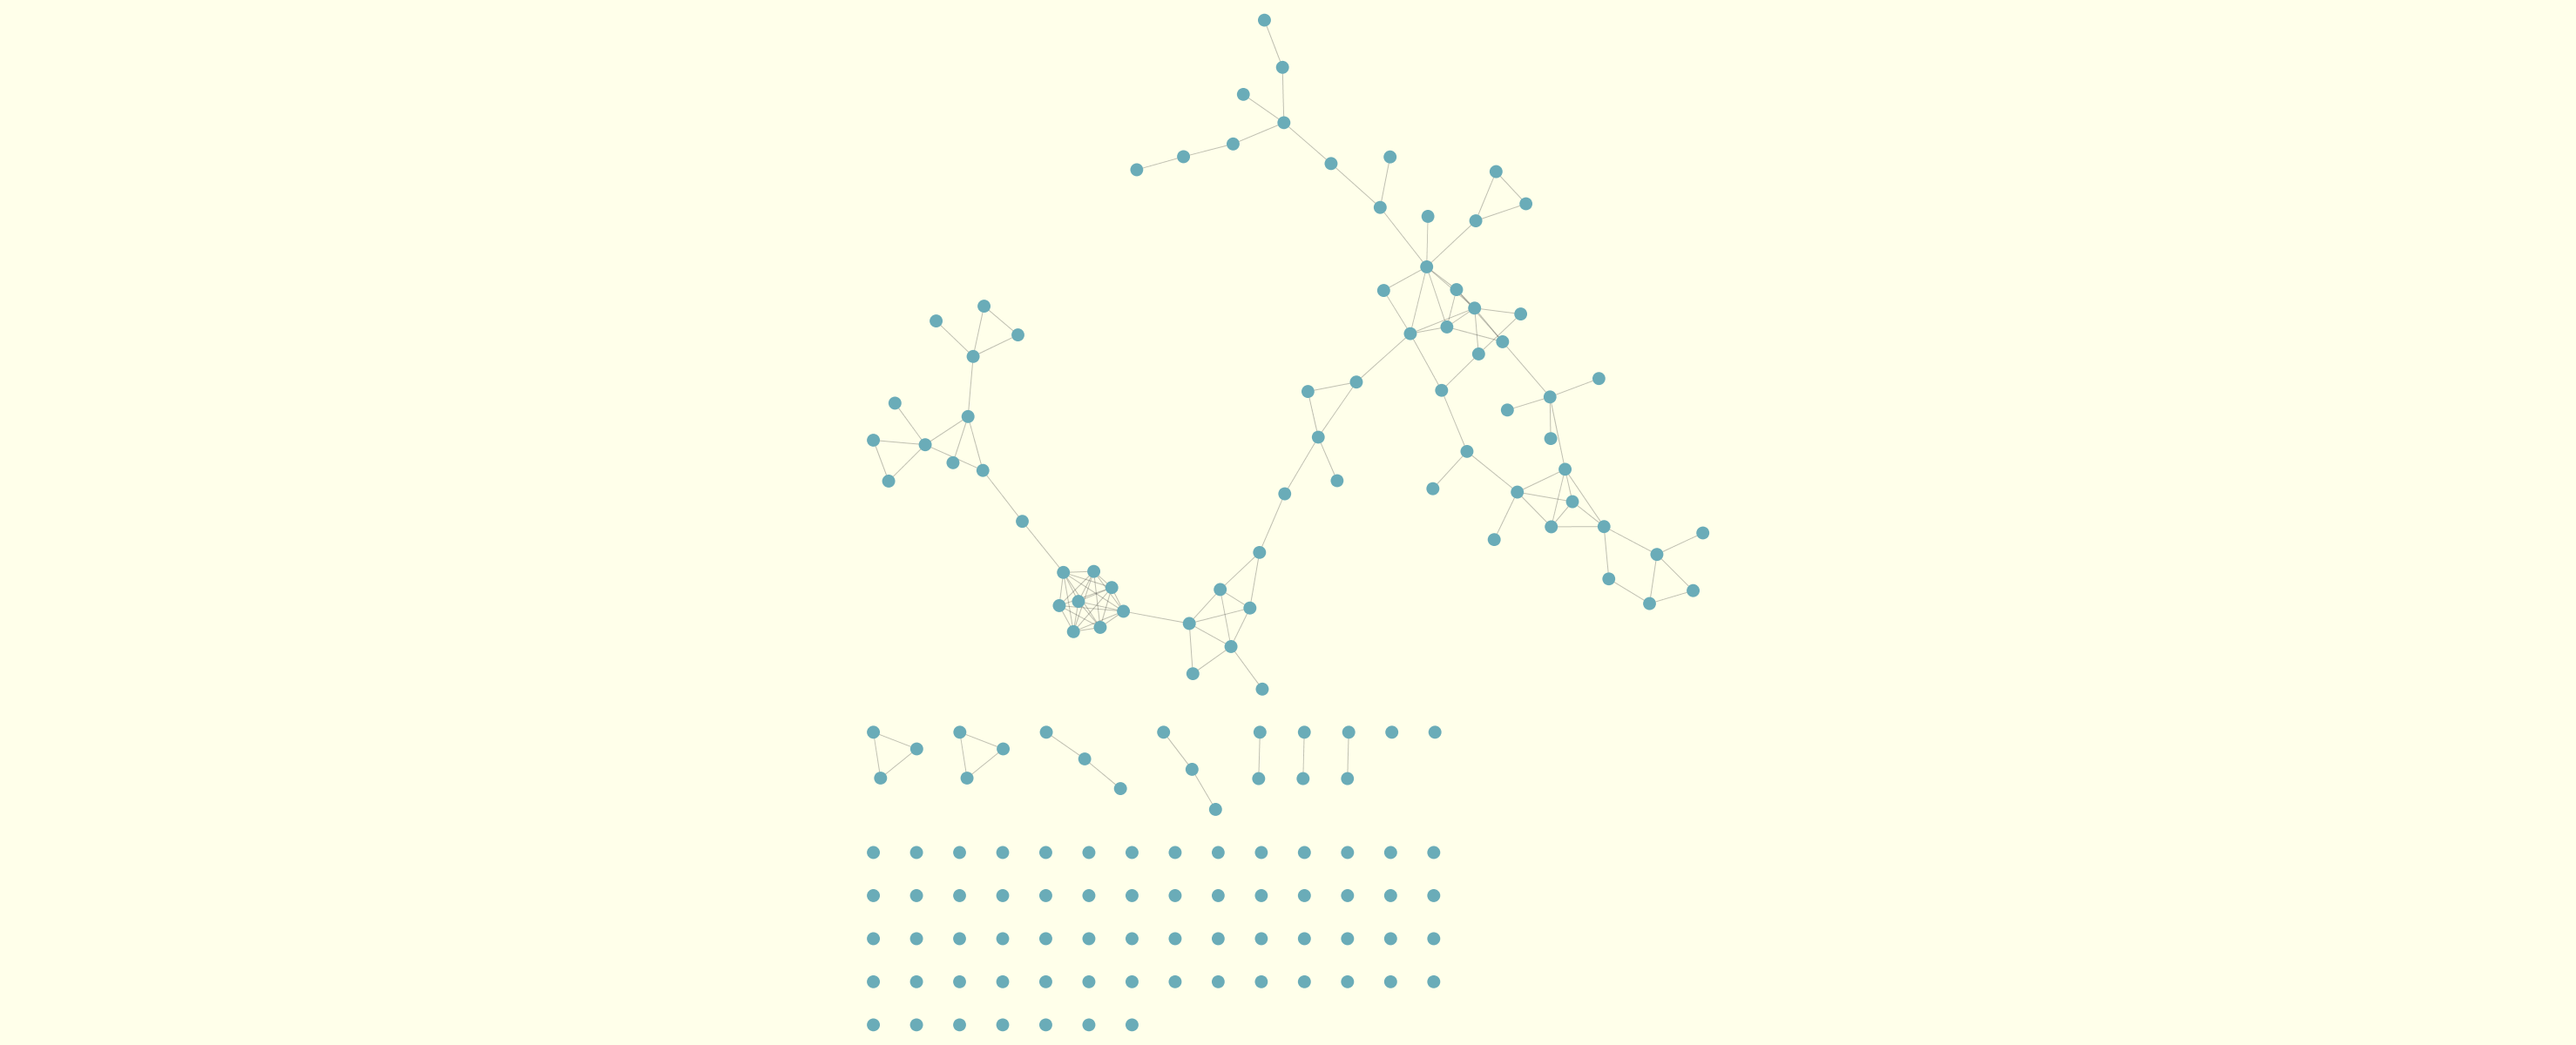

In [12]:
# Create a new Visual Style (you can call it something else than 'My style')
my_network_style = cy.style.create('My style')

# You can set default values as key-value pairs.
basic_settings = {
    
    'NODE_FILL_COLOR': '#6AACB8',
    'NODE_SIZE': 30,
    'NODE_BORDER_WIDTH': 0,
    'NODE_LABEL_COLOR': '#11111',
    'NODE_LABEL_FONT_SIZE': 10,  #LABELS!?!?!?!?
     
    'EDGE_WIDTH': 2,
    'EDGE_TRANSPARENCY': 80,
    'EDGE_STROKE_UNSELECTED_PAINT': '#333333',
    
    'NETWORK_BACKGROUND_PAINT': '#FFFFEA',
}

# Set basic style
my_network_style.update_defaults(basic_settings)


# let's apply that style
cy.style.apply(style=my_network_style, network=network)

# Show it
network_png = network.get_png()
Image(network_png)

Make a new style of your own or just try to change some of the colors or sizes of 'My style'

In [ ]:
# Create a new Visual Style (you can call it something else than 'My style')
my_network_style = cy.style.create('My style')

# You can set default values as key-value pairs.
basic_settings = {
    
    'NODE_FILL_COLOR': '#6AACB8',
    'NODE_SIZE': 30,
    'NODE_BORDER_WIDTH': 0,
    'NODE_LABEL_COLOR': '#11111',
    'NODE_LABEL_FONT_SIZE': 10,  #LABELS!?!?!?!?
     
    'EDGE_WIDTH': 2,
    'EDGE_TRANSPARENCY': 80,
    'EDGE_STROKE_UNSELECTED_PAINT': '#333333',
    
    'NETWORK_BACKGROUND_PAINT': '#FFFFEA',
}

# Set basic style
my_network_style.update_defaults(basic_settings)


# let's apply that style
cy.style.apply(style=my_network_style, network=network)

# Show it
network_png = network.get_png()
Image(network_png)

**Add your answers here**
*(double-click here to edit the cell)*

***Question I: Which of the layouts did you find least useful for this data set - and why?***

_Answer_

***Question II: What happend in cytoscape when you applied a new style to your network?***

_Answer_


## Exercise 2 - Saving images to files
 

In this very short exercise you will learn how to save your images to either as png or pdf files. 

In [ ]:
# png
from IPython.display import Image
network_png = network.get_png()
Image(network_png)

In [ ]:
# pdf
network_pdf = network.get_pdf()

# save the file
f = open('resultImage/scale_free_500.pdf', 'wb')
f.write(network_pdf)
f.close()

**Add your answers here**
*(double-click here to edit the cell)*

***Question I:Save one of your network pictures as a png file and upload it as the answer to this question***

_Answer_ (Edit, insert image)


